In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ratings.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


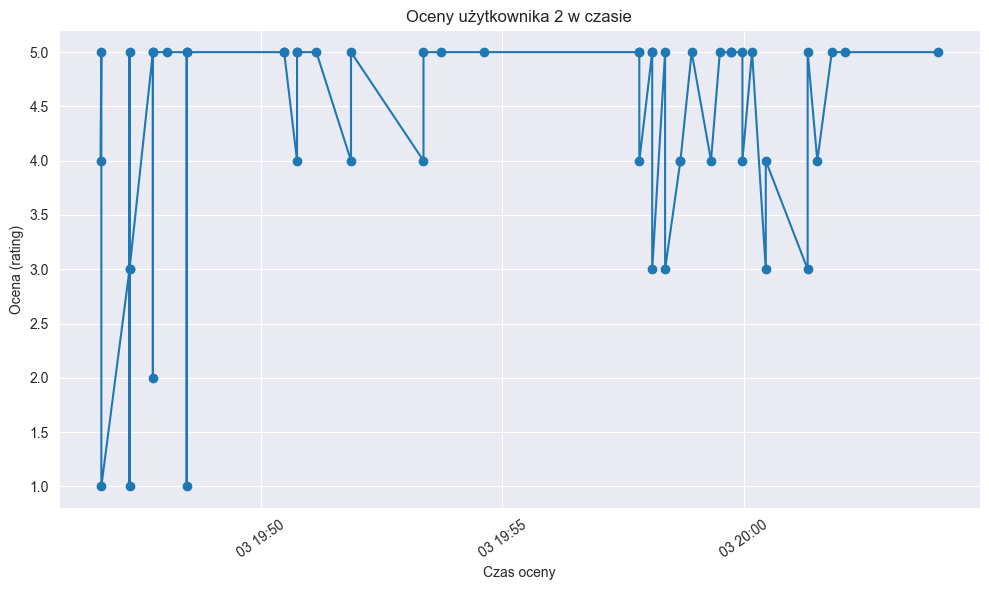

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

user_id = 2 # Wybieramy uzytkownika o id 2

df_user = df[df["userId"] == user_id].copy()
df_user.sort_values("timestamp", inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_user["timestamp"], df_user["rating"], marker="o")
plt.xlabel("Czas oceny")
plt.ylabel("Ocena (rating)")
plt.title(f"Oceny użytkownika {user_id} w czasie")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

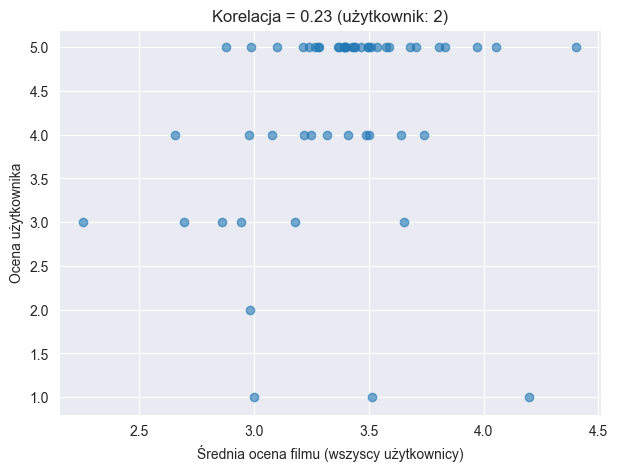

In [5]:
# Korelacja ocen uzytkownika ze srednia

df_movie_avg = (
    df.groupby("movieId")["rating"].mean()
      .rename("avg_rating")
      .reset_index()
)

df_user = df_user.merge(df_movie_avg, on="movieId", how="left")
corr_value = df_user["rating"].corr(df_user["avg_rating"])

plt.figure(figsize=(7, 5))
plt.scatter(df_user["avg_rating"], df_user["rating"], alpha=0.6)
plt.xlabel("Średnia ocena filmu (wszyscy użytkownicy)")
plt.ylabel("Ocena użytkownika")
plt.title(f"Korelacja = {corr_value:.2f} (użytkownik: {user_id})")
plt.show()

In [7]:
# Po Ratings_feature_engeenering
df_ratings = pd.read_csv("ratings_improved.csv")

In [8]:
df_ratings.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   userId       int64  
 1   movieId      int64  
 2   rating       float64
 3   timestamp    object 
 4   day_of_week  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ GB


,userId,movieId,rating,timestamp
0,1,17,4.0,1999-12-03 19:24:37
1,1,25,1.0,1999-12-03 19:43:48
2,1,29,2.0,1999-11-22 00:36:16
3,1,30,5.0,1999-12-03 19:24:37
4,1,32,5.0,1999-11-22 00:00:58


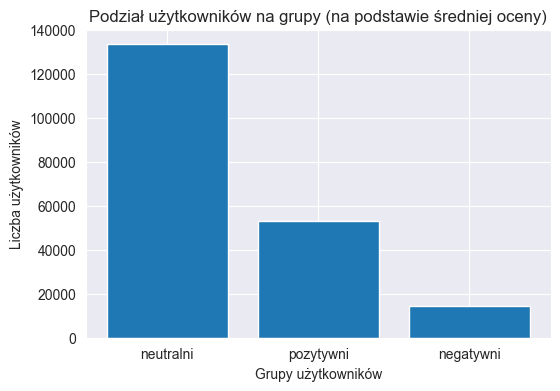

   userId  avg_rating      group
0       1    3.531915  neutralni
1       2    4.269231  pozytywni
2       3    3.588435  neutralni
3       4    2.629630  negatywni
4       5    3.272727  neutralni
5       6    4.173077  pozytywni
6       7    3.636364  neutralni
7       8    4.322581  pozytywni
8       9    4.241379  pozytywni
9      10    2.787121  negatywni
Rozmiar każdej z grup:
 group
neutralni    133526
pozytywni     53011
negatywni     14411
Name: count, dtype: int64


In [10]:
# Typy użytkowników względem oceniania (pozytywni,neutralni czy negatywni)

df_user_avg = df_ratings.groupby("userId", as_index=False)["rating"].mean()
df_user_avg.rename(columns={"rating": "avg_rating"}, inplace=True)

#    <= 2.5  => Grupa "negatywna"
#    <= 3.5  => Grupa "neutralna"
#    >  3.5  => Grupa "pozytywna"
bins = [0, 3, 4, 5]  # oceny w skali 0..5
labels = ["negatywni", "neutralni", "pozytywni"]

df_user_avg["group"] = pd.cut(
    df_user_avg["avg_rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

group_counts = df_user_avg["group"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(group_counts.index, group_counts.values)
plt.xlabel("Grupy użytkowników")
plt.ylabel("Liczba użytkowników")
plt.title("Podział użytkowników na grupy (na podstawie średniej oceny)")
plt.show()

print(df_user_avg.head(10))
print("Rozmiar każdej z grup:\n", group_counts)

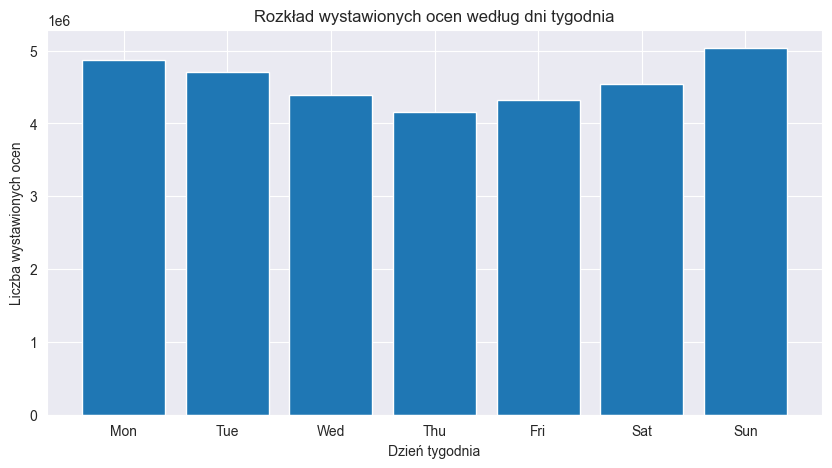

In [9]:
# Rozklad ocen na poszczegolne dni tygodnia

ratings_per_day = df_ratings.groupby("day_of_week")["rating"].count()
ratings_per_day = ratings_per_day.reindex([0,1,2,3,4,5,6])

day_map = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}

plt.figure(figsize=(10,5))
plt.bar(
    [day_map[d] for d in ratings_per_day.index],   
    ratings_per_day.values                         
)
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba wystawionych ocen")
plt.title("Rozkład wystawionych ocen według dni tygodnia")
plt.show()

In [12]:
df_users = pd.read_csv("user_features.csv")

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200948 entries, 0 to 200947
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   userId                 200948 non-null  int64  
 1   num_rating             200948 non-null  int64  
 2   avg_rating             200948 non-null  float64
 3   weekend_watcher        200948 non-null  int64  
 4   type_of_viewer         200948 non-null  object 
 5   genre_Action           199709 non-null  float64
 6   genre_Adventure        199973 non-null  float64
 7   genre_Animation        174005 non-null  float64
 8   genre_Comedy           200477 non-null  float64
 9   genre_Crime            198773 non-null  float64
 10  genre_Documentary      72079 non-null   float64
 11  genre_Drama            200882 non-null  float64
 12  genre_Family           188525 non-null  float64
 13  genre_Fantasy          196366 non-null  float64
 14  genre_History          173966 non-nu

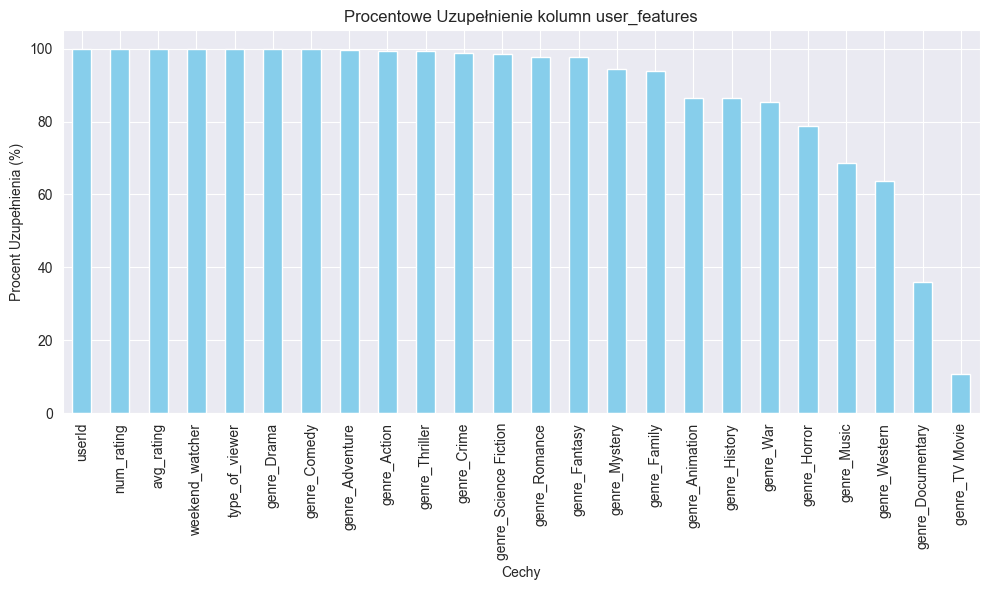

In [28]:
# Procentowe uzupełnienie danych Movies_final.csv

percentage_complete = df_users.notnull().mean() * 100

plt.figure(figsize=(10, 6))
percentage_complete.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Procentowe Uzupełnienie kolumn user_features')
plt.xlabel('Cechy')
plt.ylabel('Procent Uzupełnienia (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns

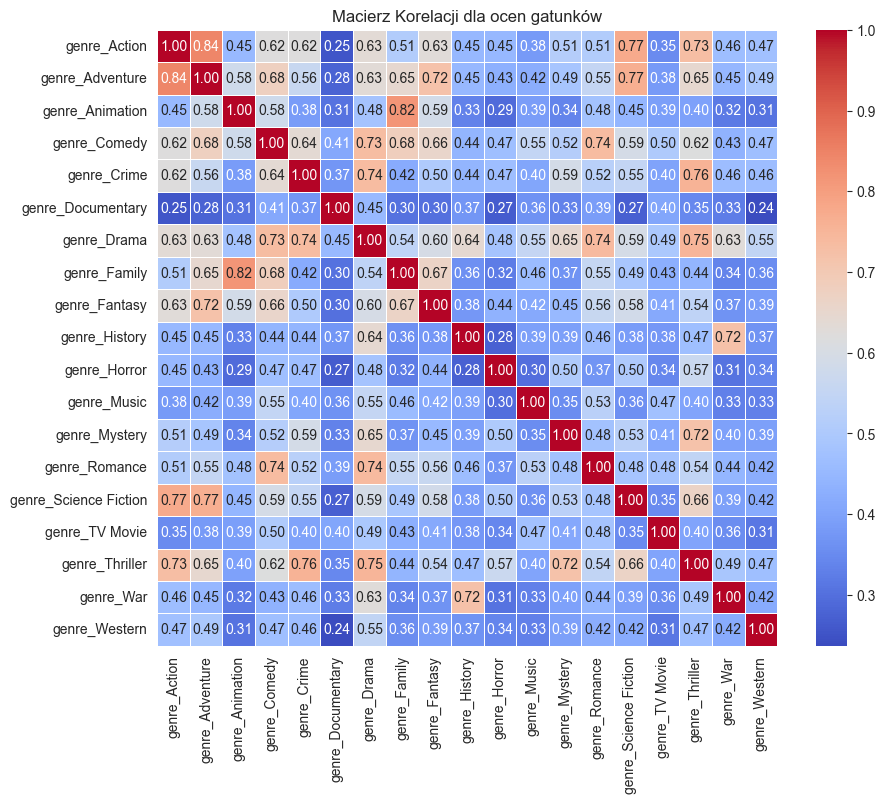

In [27]:
numeric_features = df_users.drop(columns=['type_of_viewer','userId','weekend_watcher','num_rating','avg_rating'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz Korelacji dla ocen gatunków')
plt.show()

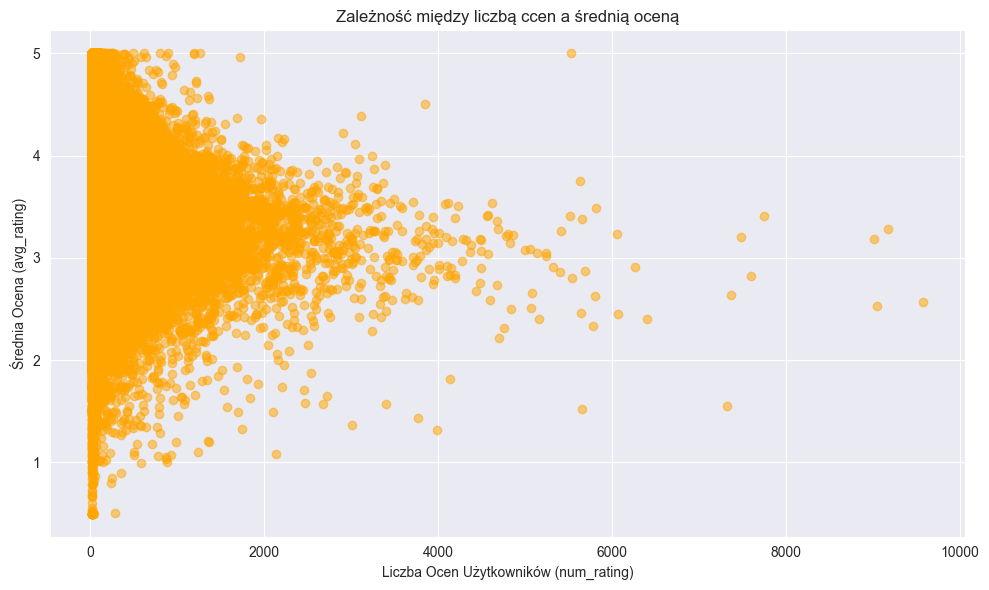

In [16]:
# Zależność między liczbą ccen a średnią oceną

df_cleaned = df_users.dropna(subset=['num_rating', 'avg_rating'])
df_cleaned = df_cleaned[df_cleaned['num_rating'] > 0]
df_cleaned = df_cleaned[df_cleaned['num_rating'] <= 10000]

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['num_rating'], df_cleaned['avg_rating'], alpha=0.5, color='orange')
plt.title('Zależność między liczbą ccen a średnią oceną')
plt.xlabel('Liczba Ocen Użytkowników (num_rating)')
plt.ylabel('Średnia Ocena (avg_rating)')
plt.tight_layout()
plt.show()


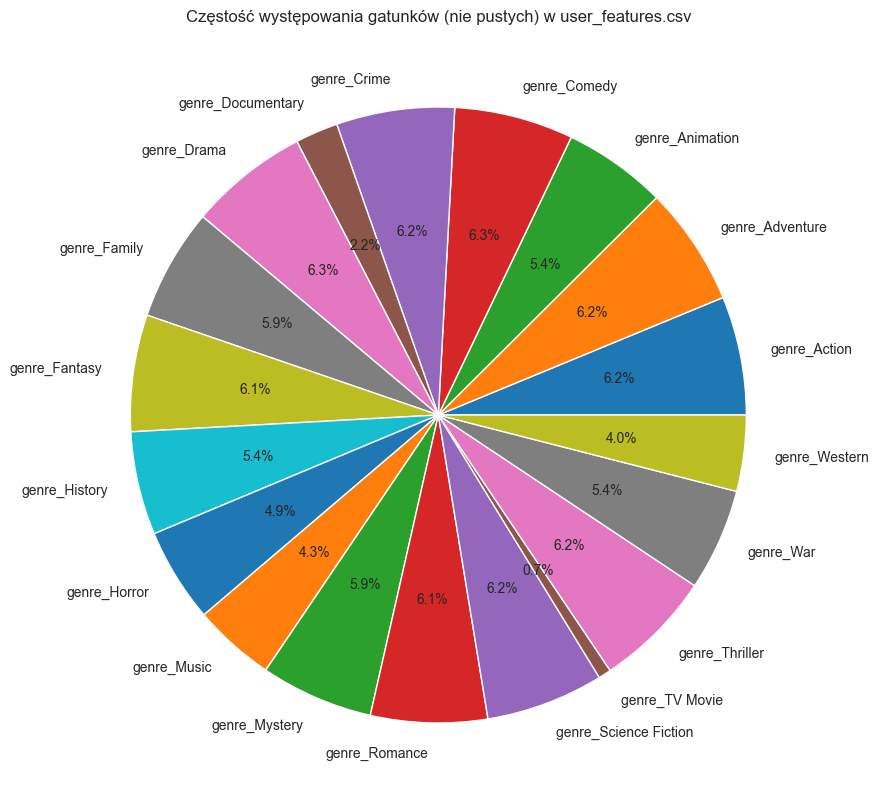

genre_Action             199709
genre_Adventure          199973
genre_Animation          174005
genre_Comedy             200477
genre_Crime              198773
genre_Documentary         72079
genre_Drama              200882
genre_Family             188525
genre_Fantasy            196366
genre_History            173966
genre_Horror             158323
genre_Music              137776
genre_Mystery            189701
genre_Romance            196391
genre_Science Fiction    198012
genre_TV Movie            21385
genre_Thriller           199635
genre_War                171764
genre_Western            127961
dtype: int64


In [13]:
genre_cols = [col for col in df_users.columns if col.startswith("genre_")]
counts = df_users[genre_cols].notna().sum()

plt.figure(figsize=(10, 10))
counts.plot(kind="pie", autopct="%.1f%%")
plt.title("Częstość występowania gatunków (nie pustych) w user_features.csv")
plt.ylabel("")  # ukrywamy etykietę osi Y dla estetyki
plt.show()

print(counts)